In [1]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

import json, glob, os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import utils.load_grid as lg

In [45]:
def read_json(fpath):
    with open(fpath) as hdl:
        data = json.load(hdl)
    
    out = {}
    for k in data["data"].keys():
        arr = [float(v) for v in data["data"][k]["values"]]
        out[k] = np.array(arr, dtype=float) * float(data["data"][k]["scaling"])
    out["time"] = float(data["time_years"])
    return out

In [46]:
case_dir = "data/article_data/jgr_grid_final/case_00714/"

In [47]:
years = lg.get_json_years(case_dir)
files = [case_dir+"data/%d.json"%y for y in years]
jsons = [read_json(f) for f in files]
nfiles = len(years)

Text(0.5, 0, 'Time [yr]')

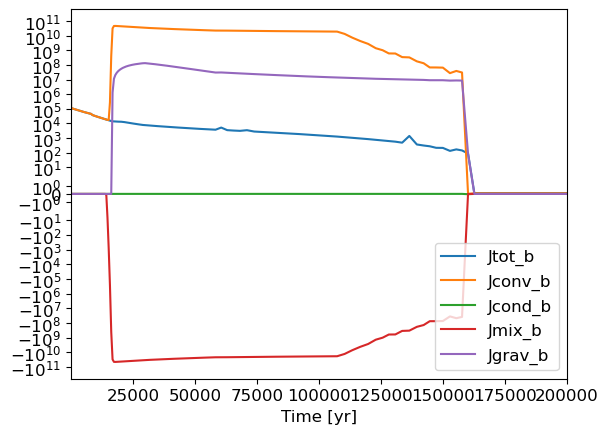

In [61]:
lvl = 100
keys = ["Jtot_b","Jconv_b","Jcond_b","Jmix_b","Jgrav_b"]
ys = {}
for k in keys:
    ys[k] = []
t = []

for i in range(nfiles):
    dat = jsons[i]
    t.append(dat["time"])
    for k in keys:
        ys[k].append(dat[k][lvl])


fig,ax = plt.subplots(1,1)
for k in keys:
    ax.plot(t,ys[k], label=k)

ax.set_yscale("symlog")
ax.legend(loc="lower right")

ax.set_xlim(1,2e5)
ax.set_xlabel("Time [yr]")